In [1]:
import pandas as pd
import numpy as np

In [3]:
pip install odfpy

  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=137518 sha256=3a5454bcc47591950d0eccaa0a022d1b605b9836bb309d454dcaa97569b30d19
  Stored in directory: c:\users\sbondu\appdata\local\pip\cache\wheels\20\ff\69\1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('/Users/sbondu/Downloads/CCPP/CCPP/dataset.ods')

In [5]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
# x is indepedent variable, y is dependent variable

In [9]:
x = df.drop(['PE'], axis = 1).values
y = df['PE'].values

In [10]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [11]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Split the Dataset into Training and Testing

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

# Training the Data

In [13]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(x_train,y_train)

LinearRegression()

# Predict the results

In [14]:
y_pred = m.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [15]:
m.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

# Evaluation

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477682

# Plotting

Text(0.5, 1.0, 'Actual vs Predicted')

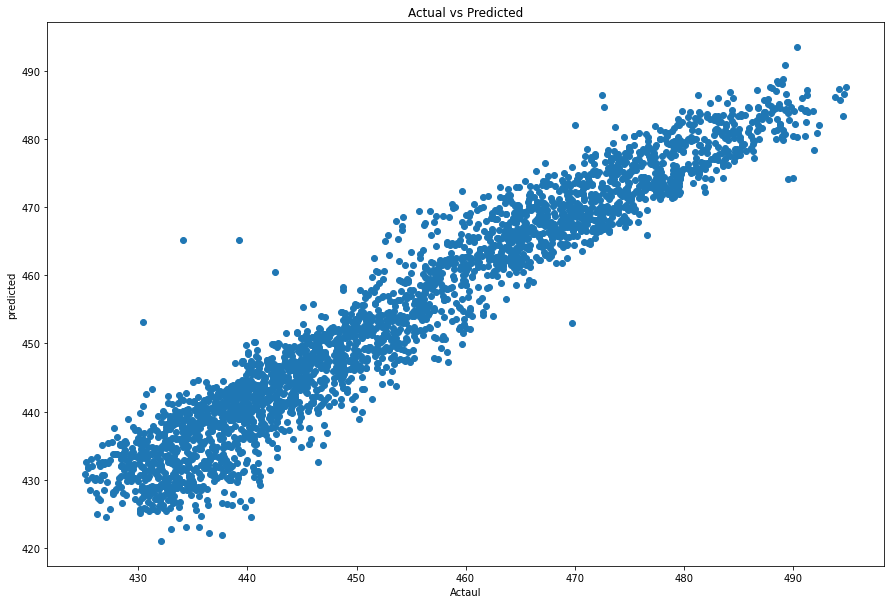

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actaul')
plt.ylabel('predicted')
plt.title('Actual vs Predicted')

# Predicted Values

In [19]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172
